# Test and CrossValidate

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

/home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


## Load data

In [2]:
# Cargar los datos
import glob

# Get a list of all CSV files in the directory
csv_files = glob.glob('predictions_data/predictions_1_filtrado.csv/*.csv')

# Initialize an empty list to store individual DataFrames
dfs = []

# Loop through each CSV file and read it into a DataFrame
for file in csv_files:
    df_temp = pd.read_csv(file)
    dfs.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Optional: Reset the index of the final DataFrame
df.reset_index(drop=True, inplace=True)

df.head()


df = df.rename(columns={'day_hour': 'ds', 'avg_all_users': 'y'})

# Asumiendo que tu DataFrame se llama 'df'

# Primero, asegúrate de que 'ds' es de tipo datetime
df['ds'] = pd.to_datetime(df['ds'])

# Luego, elimina la información de zona horaria
df['ds'] = df['ds'].dt.tz_localize(None)

# Verifica el tipo de datos de la columna 'ds'
print(df['ds'].dtype)

df.head()

datetime64[ns]


,ds,y
0,2018-11-13 12:00:00,0.000
1,2018-11-13 13:00:00,0.000
2,2018-11-13 14:00:00,0.000
3,2018-11-13 15:00:00,0.015
4,2018-11-13 16:00:00,0.000


## 1. Basic: Train and Test a model
First, we show how to fit a model and evaluate it on a holdout set.

### 1.1 Train-Test evaluation

In [3]:
m = NeuralProphet(seasonality_mode="additive", learning_rate=0.1)
m.set_plotting_backend("plotly-static")

# df_train, df_test = m.split_df(df=df, freq="MS", valid_p=0.2)

df_train = df[df["ds"] > "2020-01-01 00:00:00"]
df_test = df[df["ds"] >= "2023-01-01 00:00:00"]

metrics_train = m.fit(df=df_train, freq="MS")
metrics_test = m.test(df=df_test)

metrics_test

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds =

Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 47.11it/s, loss=0.0214, v_num=27, MAE=0.000528, RMSE=0.000705, Loss=0.0224, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds =


Testing DataLoader 0: 100%|██████████| 12/12 [00:00<00:00, 171.12it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.045346688479185104
         MAE_val           0.0006412097136490047
        RMSE_val           0.0007839326863177121
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


,MAE_val,RMSE_val,Loss_test,RegLoss_test
0,0.000641,0.000784,0.045347,0.0


In [4]:
df_train

,ds,y
9920,2020-01-01 01:00:00,0.001299
9921,2020-01-01 02:00:00,0.001022
9922,2020-01-01 03:00:00,0.000980
9923,2020-01-01 04:00:00,0.001036
9924,2020-01-01 05:00:00,0.001070
...,...,...
47516,2024-04-15 17:00:00,0.008630
47517,2024-04-15 18:00:00,0.007671
47518,2024-04-15 19:00:00,0.006005
47519,2024-04-15 20:00:00,0.004719


In [5]:
df_test

,ds,y
36220,2023-01-01 00:00:00,0.001468
36221,2023-01-01 01:00:00,0.001186
36222,2023-01-01 02:00:00,0.001048
36223,2023-01-01 03:00:00,0.001037
36224,2023-01-01 04:00:00,0.001227
...,...,...
47516,2024-04-15 17:00:00,0.008630
47517,2024-04-15 18:00:00,0.007671
47518,2024-04-15 19:00:00,0.006005
47519,2024-04-15 20:00:00,0.004719


### 1.2 Predict into future
Before making any actual forecasts, re-fit the model on all data available, else you are greatly reducing your forecast accuracy!

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds =

Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 59.27it/s, loss=0.0291, v_num=28, MAE=0.000913, RMSE=0.00148, Loss=0.0293, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds =


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 617.26it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



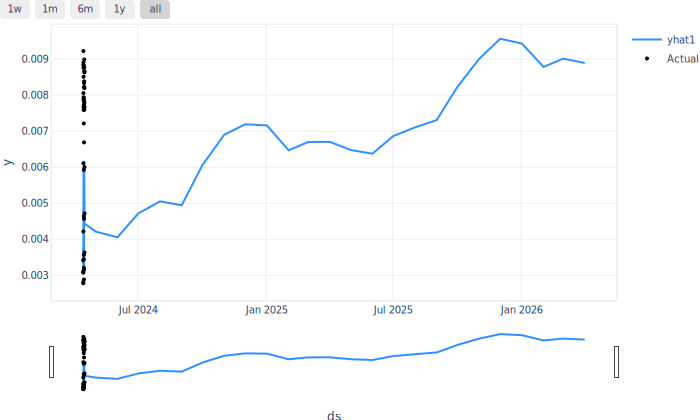

In [6]:
m = NeuralProphet(seasonality_mode="additive", learning_rate=0.1)
m.set_plotting_backend("plotly-static")
metrics_train2 = m.fit(df=df, freq="MS")
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=48)
forecast = m.predict(future)
m.plot(forecast)

### 1.3 Visualize training
If you installed the `[live]` version of NeuralProphet, you can additionally visualize your training progress and spot any overfitting by evaluating every epoch.

Note: Again, before making any predictions, re-fit the model with the entire data first.

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 43.91it/s, loss=0.0245, v_num=29, MAE_val=0.000648, RMSE_val=0.000785, Loss_val=0.045, RegLoss_val=0.000, MAE=0.000527, RMSE=0.000705, Loss=0.0225, RegLoss=0.000]    


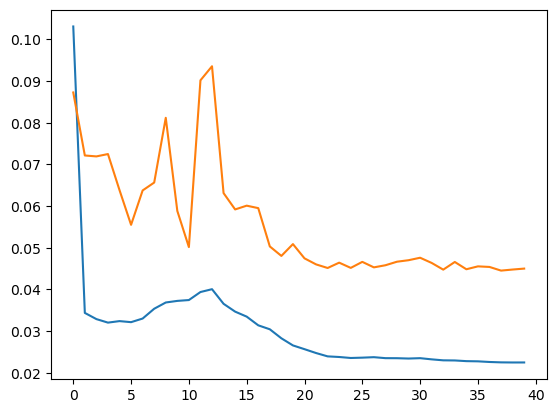

In [7]:
m = NeuralProphet(seasonality_mode="additive", learning_rate=0.1)
m.set_plotting_backend("plotly-static")

# df_train, df_test = m.split_df(df=df, freq="MS", valid_p=0.2)
df_train = df[df["ds"] > "2020-01-01 00:00:00"]
df_test = df[df["ds"] >= "2023-01-01 00:00:00"]

metrics = m.fit(df=df_train, freq="MS", validation_df=df_test, progress="plot")

In [8]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
39,0.000648,0.000785,0.044992,0.0,39,0.000527,0.000705,0.022461,0.0


## 2. Time-series Cross-Validation
Time-series cross-validation is a technique that is also referred to as a rolling origin backtest. It involves dividing the data into several folds. 
* During the first fold, we train the model on a portion of the data and then evaluate its performance on the next set of data points, which are determined by the fold_pct parameter (percentage of samples in each fold).
* In the next fold, we include the evaluation data from the previous fold in the training data and then evaluate the model's performance on a later set of data points. 
* This process is repeated until the final fold, where the evaluation data reaches the end of the available data. Essentially, the forecast origin "rolls" forward as we move from one fold to the next.


Note: Before making any actual forecasts, re-fit the model on all data available, else you are greatly reducing your forecast accuracy!

In [9]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {"seasonality_mode": "multiplicative", "learning_rate": 0.1}

folds = NeuralProphet(**params).crossvalidation_split_df(df, freq="MS", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




In [10]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    m.set_plotting_backend("plotly-static")
    train = m.fit(df=df_train, freq="MS")
    test = m.test(df=df_test)
    
    # Usar pd.concat en lugar de .append
    metrics_train = pd.concat([metrics_train, pd.DataFrame([train[METRICS].iloc[-1]])], ignore_index=True)
    metrics_test = pd.concat([metrics_test, pd.DataFrame([test[METRICS_VAL].iloc[-1]])], ignore_index=True)


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




Epoch 50: 100%|██████████| 50/50 [00:00<00:00, 130.56it/s, loss=0.0165, v_num=30, MAE=0.000672, RMSE=0.00132, Loss=0.019, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 174.06it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.012171344831585884
         MAE_val           0.0006068568327464163
        RMSE_val           0.0007337328279390931
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_147205/2227897399.py:11: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_147205/2227897399.py:12: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an 

Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 82.60it/s, loss=0.0192, v_num=31, MAE=0.000668, RMSE=0.00129, Loss=0.0198, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 68.80it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.26622098684310913
         MAE_val            0.00326385535299778
        RMSE_val           0.0035357926972210407
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 70.01it/s, loss=0.0177, v_num=32, MAE=0.000665, RMSE=0.00118, Loss=0.0185, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 138.03it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.0575137622654438
         MAE_val           0.0012958971783518791
        RMSE_val           0.0014240564778447151
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 55.07it/s, loss=0.0223, v_num=33, MAE=0.000626, RMSE=0.00119, Loss=0.0229, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 166.31it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.017260827124118805
         MAE_val           0.0005225793574936688
        RMSE_val           0.0006419443525373936
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 46.05it/s, loss=0.026, v_num=34, MAE=0.000624, RMSE=0.00112, Loss=0.0279, RegLoss=0.000]    

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 220.10it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.2060437649488449
         MAE_val           0.0016712486976757646
        RMSE_val           0.0018687986303120852
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [11]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE_val,RMSE_val
mean,0.001472,0.001641
std,0.001110,0.001174
min,0.000523,0.000642
max,0.003264,0.003536


## 2. Advanced: 3-Phase Train, Validate and Test procedure
Finally, in 2.1 and 2.2, we will do a 3-part data split to do a proper training, validation and test evaluation of your model. This setup is used if you do not want to bias your performance evaluation by your manual hyperparameter tuning. this is, however not common when working with time series, unless you work in academia. Crossvalidation is usually more than adequate to evaluate your model performance.

If you are confused by this, simply ignore this section and continue your forecasting life. Or if you got curious, read up on how to evaluate machine learning models to level up your skills.

### 2.1 Train, Validate and Test evaluation

In [12]:
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
m.set_plotting_backend("plotly-static")

# create a test holdout set:
df_train_val, df_test = m.split_df(df=df, freq="MS", valid_p=0.2)
# create a validation holdout set:
df_train, df_val = m.split_df(df=df_train_val, freq="MS", valid_p=0.2)

# fit a model on training data and evaluate on validation set.
metrics_train1 = m.fit(df=df_train, freq="MS")
metrics_val = m.test(df=df_val)

# refit model on training and validation data and evaluate on test set.
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
m.set_plotting_backend("plotly-static")
metrics_train2 = m.fit(df=df_train_val, freq="MS")
metrics_test = m.test(df=df_test)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureW

Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 62.07it/s, loss=0.0188, v_num=35, MAE=0.000588, RMSE=0.00112, Loss=0.0175, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 8/8 [00:00<00:00, 213.39it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.008796055801212788
         MAE_val            0.00041725262417458
        RMSE_val           0.0005220999591983855
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 48.61it/s, loss=0.0273, v_num=36, MAE=0.000623, RMSE=0.00112, Loss=0.0278, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 10/10 [00:00<00:00, 201.59it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.2061700075864792
         MAE_val           0.0016737511614337564
        RMSE_val           0.0018687548581510782
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [13]:
metrics_train1["split"] = "train1"
metrics_train2["split"] = "train2"
metrics_val["split"] = "validate"
metrics_test["split"] = "test"
# metrics_train1.tail(1).append([metrics_train2.tail(1), metrics_val, metrics_test]).drop(columns=["RegLoss"])

result = pd.concat([metrics_train1.tail(1), metrics_train2.tail(1), metrics_val, metrics_test], ignore_index=True).drop(columns=["RegLoss"])
result


,MAE,RMSE,Loss,epoch,split,MAE_val,RMSE_val,Loss_test,RegLoss_test
0,0.000588,0.001116,0.017529,39.0,train1,NaN,NaN,NaN,NaN
1,0.000623,0.001116,0.027811,39.0,train2,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,validate,0.000417,0.000522,0.008796,0.0
3,NaN,NaN,NaN,NaN,test,0.001674,0.001869,0.206170,0.0


### 2.2 Train, Cross-Validate and Cross-Test evaluation

In [14]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {"seasonality_mode": "multiplicative", "learning_rate": 0.1}

folds_val, folds_test = NeuralProphet(**params).double_crossvalidation_split_df(
    df, freq="MS", k=5, valid_pct=0.10, test_pct=0.10
)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




In [15]:
# metrics_train1 = pd.DataFrame(columns=METRICS)
# metrics_val = pd.DataFrame(columns=METRICS_VAL)
# for df_train1, df_val in folds_val:
#     m = NeuralProphet(**params)
#     m.set_plotting_backend("plotly-static")
#     train1 = m.fit(df=df_train, freq="MS")
#     val = m.test(df=df_val)
#     metrics_train1 = metrics_train1.append(train1[METRICS].iloc[-1])
#     metrics_val = metrics_val.append(val[METRICS_VAL].iloc[-1])

# metrics_train2 = pd.DataFrame(columns=METRICS)
# metrics_test = pd.DataFrame(columns=METRICS_VAL)
# for df_train2, df_test in folds_test:
#     m = NeuralProphet(**params)
#     m.set_plotting_backend("plotly-static")
#     train2 = m.fit(df=df_train2, freq="MS")
#     test = m.test(df=df_test)
#     metrics_train2 = metrics_train2.append(train2[METRICS].iloc[-1])
#     metrics_test = metrics_test.append(test[METRICS_VAL].iloc[-1])

# Actualización de los bucles for para usar pd.concat en lugar de append
metrics_train1 = pd.DataFrame(columns=METRICS)
metrics_val = pd.DataFrame(columns=METRICS_VAL)
for df_train1, df_val in folds_val:
    m = NeuralProphet(**params)
    m.set_plotting_backend("plotly-static")
    train1 = m.fit(df=df_train1, freq="MS")
    val = m.test(df=df_val)
    
    # Usar pd.concat en lugar de append
    metrics_train1 = pd.concat([metrics_train1, pd.DataFrame([train1[METRICS].iloc[-1]])], ignore_index=True)
    metrics_val = pd.concat([metrics_val, pd.DataFrame([val[METRICS_VAL].iloc[-1]])], ignore_index=True)

metrics_train2 = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)
for df_train2, df_test in folds_test:
    m = NeuralProphet(**params)
    m.set_plotting_backend("plotly-static")
    train2 = m.fit(df=df_train2, freq="MS")
    test = m.test(df=df_test)
    
    # Usar pd.concat en lugar de append
    metrics_train2 = pd.concat([metrics_train2, pd.DataFrame([train2[METRICS].iloc[-1]])], ignore_index=True)
    metrics_test = pd.concat([metrics_test, pd.DataFrame([test[METRICS_VAL].iloc[-1]])], ignore_index=True)

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 45.85it/s, loss=0.0263, v_num=37, MAE=0.000623, RMSE=0.00111, Loss=0.0278, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 174.99it/s]

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_147205/3622269486.py:31: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_147205/3622269486.py:32: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.01162324845790863
         MAE_val          0.00038562342524528503
        RMSE_val          0.00046641554217785597
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 45.89it/s, loss=0.0283, v_num=38, MAE=0.000602, RMSE=0.00108, Loss=0.0266, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 161.13it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.0112203573808074
         MAE_val          0.00033767835702747107
        RMSE_val           0.0004533937608357519
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.




Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 44.19it/s, loss=0.0254, v_num=39, MAE=0.00058, RMSE=0.00106, Loss=0.0255, RegLoss=0.000]    

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 168.87it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.012460485100746155
         MAE_val          0.00034688442246988416
        RMSE_val           0.0004738045681733638
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 41.44it/s, loss=0.0251, v_num=40, MAE=0.000563, RMSE=0.00104, Loss=0.025, RegLoss=0.000]    

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 209.83it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.01725436933338642
         MAE_val           0.0004594873171299696
        RMSE_val           0.0005528482142835855
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 40.94it/s, loss=0.0274, v_num=41, MAE=0.000555, RMSE=0.00104, Loss=0.025, RegLoss=0.000]    

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 195.53it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.01829642802476883
         MAE_val           0.0004486390098463744
        RMSE_val           0.0005648836959153414
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:01<00:00, 38.83it/s, loss=0.0272, v_num=42, MAE=0.000554, RMSE=0.00105, Loss=0.0258, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 158.30it/s]

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_147205/3622269486.py:43: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_147205/3622269486.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an 


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.031625933945178986
         MAE_val           0.0005813513416796923
        RMSE_val           0.0007362937903963029
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 42.59it/s, loss=0.0279, v_num=43, MAE=0.000563, RMSE=0.00108, Loss=0.0268, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 173.46it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.04352574795484543
         MAE_val           0.0007401020848192275
        RMSE_val           0.000865260895807296
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:01<00:00, 39.65it/s, loss=0.028, v_num=44, MAE=0.000587, RMSE=0.00111, Loss=0.0272, RegLoss=0.000]    

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 187.45it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.43710699677467346
         MAE_val           0.0031583381351083517
        RMSE_val           0.0037132184952497482
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:01<00:00, 37.72it/s, loss=0.0302, v_num=45, MAE=0.000668, RMSE=0.00127, Loss=0.0315, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 182.71it/s]

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.4978955388069153
         MAE_val           0.003898216877132654
        RMSE_val           0.004133106209337711
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch 40: 100%|██████████| 40/40 [00:00<00:00, 61.00it/s, loss=0.027, v_num=46, MAE=0.000811, RMSE=0.00142, Loss=0.0282, RegLoss=0.000]    

WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /home/teresa/miniconda3/envs/forecasting_env/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.





Testing DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 203.62it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.25589457154273987
         MAE_val           0.0030041197314858437
        RMSE_val           0.0031889344099909067
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [16]:
metrics_train2.describe().loc[["mean", "std"]]

,MAE,RMSE
mean,0.000637,0.001188
std,0.000107,0.000157


In [17]:
metrics_val.describe().loc[["mean", "std"]]

,MAE_val,RMSE_val
mean,0.000396,0.000502
std,0.000056,0.000052


In [19]:
metrics_test.describe().loc[["mean", "std"]]

,MAE_val,RMSE_val
mean,0.002276,0.002527
std,0.001514,0.001612
